## Cluster Analysis

In [1]:
%matplotlib inline
import cx_Oracle
import time
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
conn = cx_Oracle.connect("socsusr", "socsusr1234", "192.168.1.140:1521/testdb12c", encoding="UTF-8", nencoding="UTF-8")
cur = conn.cursor()
cur

<cx_Oracle.Cursor on <cx_Oracle.Connection to socsusr@192.168.1.140:1521/testdb12c>>

In [3]:
sql = '''
select * from 
"A1D_LOW_TYPE"
'''
df = pd.read_sql(sql, con = conn)

In [4]:
# AGE < 0 and null
df = df.drop(index = [33045, 33046, 33873, 33882])
df = df.drop(index = [125380, 125682, 170789, 170791, 215960, 215961])


In [5]:
x = ['NATION', 'BIRTHDAY', 'AGE', 'SEX', 'APPLIED', 'HELPED', 'DRAWED', 'GRANT_YN',
'VETERAN', 'SETTLED', 'ABORIGINE', 'FOREIGNER', 'FOREIGNER_CHILD', 'SINGLE_TYPE', 'SINGLE_PARENT',
'SINGLE_CHILD', 'NEXT_GERATION', 'SINGLE_LIVE', 'SICK_CARD', 'SPC_WOM', 'TRANJOB_YN', 'GRADUATE_YN',
'CRIP_TYPE', 'CRIP_LEVEL', 'MARRY', 'EXCEPT_YN', 'EXCEPT_PROP'
]
tab = df[x]
tab.head()
tab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222433 entries, 0 to 222442
Data columns (total 27 columns):
NATION             222433 non-null object
BIRTHDAY           222433 non-null object
AGE                222433 non-null float64
SEX                222433 non-null object
APPLIED            222433 non-null object
HELPED             222433 non-null object
DRAWED             222433 non-null object
GRANT_YN           222433 non-null object
VETERAN            222433 non-null object
SETTLED            222433 non-null object
ABORIGINE          222433 non-null object
FOREIGNER          222433 non-null object
FOREIGNER_CHILD    222433 non-null object
SINGLE_TYPE        5786 non-null object
SINGLE_PARENT      222433 non-null object
SINGLE_CHILD       222433 non-null object
NEXT_GERATION      222433 non-null object
SINGLE_LIVE        222433 non-null object
SICK_CARD          222433 non-null object
SPC_WOM            222433 non-null object
TRANJOB_YN         222433 non-null object
GRADUATE

In [6]:
from sklearn.preprocessing import LabelEncoder
label =LabelEncoder()
df['LOW_TYPE']=label.fit_transform(df['LOW_TYPE'])
tab['APPLIED']=label.fit_transform(tab['APPLIED'])
tab['HELPED']=label.fit_transform(tab['HELPED'])
tab['DRAWED']=label.fit_transform(tab['DRAWED'])
tab['GRANT_YN']=label.fit_transform(tab['GRANT_YN'])
tab['VETERAN']=label.fit_transform(tab['VETERAN'])
tab['SETTLED']=label.fit_transform(tab['SETTLED'])
tab['ABORIGINE']=label.fit_transform(tab['ABORIGINE'])
tab['FOREIGNER']=label.fit_transform(tab['FOREIGNER'])
tab['FOREIGNER_CHILD']=label.fit_transform(tab['FOREIGNER_CHILD'])
tab['SINGLE_PARENT']=label.fit_transform(tab['SINGLE_PARENT'])
tab['SINGLE_CHILD']=label.fit_transform(tab['SINGLE_CHILD'])
tab['NEXT_GERATION']=label.fit_transform(tab['NEXT_GERATION'])
tab['SINGLE_LIVE']=label.fit_transform(tab['SINGLE_LIVE'])
tab['SICK_CARD']=label.fit_transform(tab['SICK_CARD'])
tab['SPC_WOM']=label.fit_transform(tab['SPC_WOM'])
tab['TRANJOB_YN']=label.fit_transform(tab['TRANJOB_YN'])
tab['GRADUATE_YN']=label.fit_transform(tab['GRADUATE_YN'])
tab['EXCEPT_YN']=label.fit_transform(tab['EXCEPT_YN'])
tab['EXCEPT_PROP']=label.fit_transform(tab['EXCEPT_PROP'])
tab['MARRY']=label.fit_transform(tab.MARRY.fillna('0'))
tab['SINGLE_TYPE']=label.fit_transform(tab.SINGLE_TYPE.fillna('0'))

tab['CRIP_TYPE'] = tab.CRIP_TYPE.fillna(0)
# tab['SINGLE_TYPE'] = tab.SINGLE_TYPE.fillna(0)
tab['CRIP_LEVEL'] = tab.CRIP_LEVEL.fillna(0)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

In [7]:
for i in range(tab.shape[1]):
    print(i, tab[x].iloc[:,i].unique())


0 ['1' '3' '2']
1 ['0610626' '0920711' '0471010' ... '0060120' '-080914' '-020129']
2 [ 46.  15.  60.  84.  70.  39.  72.  52.  20.  58.  11.  14.  50.  18.
  48.  71.  65.  44.  53.  24.  19.  17.  47.  74.  55.   2.  10.  34.
  13.  64.  91.  62.  29.  59.  88.  21.  28.  56.  40.  45.  16.  67.
  32.  66.   9.  51.  73.  27.  61.  69.  43.  35.  77.  94.  93.  42.
  63.   4.  36.  82.  30.  68.  41.  79.  25.  23.  33.  37.   6.  12.
  80.  57.   8.   1.  85.  96.  38.  76.   3.   7.  22.  49.  75.  86.
  54.  81.  78.  87.  89.   5.  97.   0.  26.  90. 100.  31.  95.  83.
  99.  92. 115. 106. 112. 101.  98. 103. 105. 122. 116. 111. 104. 108.
 117. 109. 127. 114. 102. 113. 110. 121. 119. 131. 123. 118. 126. 124.
 120. 133. 128. 130. 134. 125. 129. 136. 141. 137. 138. 140.]
3 ['2' '1']
4 [1 0]
5 [1 0]
6 [1 0]
7 [1 0]
8 [0 1]
9 [0 1]
10 [0 1]
11 [0 1]
12 [0 1]
13 [1 0 2 3]
14 [1 0]
15 [0 1]
16 [0 1]
17 [0 1]
18 [0 1]
19 [0 1]
20 [0 1]
21 [0 1]
22 [0 '06' '01' '17' '04' '11' '15' '02' 

In [ ]:
tab.to_csv("C:/Users/SA/Desktop/a1d_low_type.csv", index = 0)

2
3
4
5
6
7
8
9
10


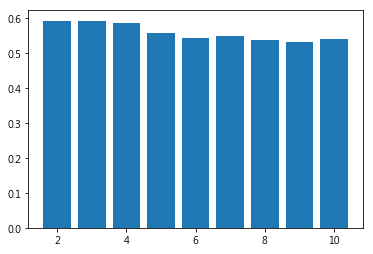

[0.5913043374151761, 0.5930133212777422, 0.5859166881564334, 0.558314901927549, 0.5442302047943839, 0.547958043827612, 0.5389881020567983, 0.5328124799332891, 0.5410275119402994]


In [8]:
# from sklearn.cluster import KMeans
from sklearn import cluster, datasets, metrics
# clf = cluster.KMeans(n_clusters = 4)
# X = [tab.AGE, tab.SINGLE_LIVE, tab.SEX]
# clf.fit(tab[x])
# print(clf.labels_)
# print(X)
# df[tab.AGE == -16]
silhouette_avgs = []
ks = range(2, 11)
for k in ks:
    print(k)
    kmeans_fit = cluster.KMeans(n_clusters = k, n_jobs = -1).fit(tab[x])
    cluster_labels = kmeans_fit.labels_
    silhouette_avg = metrics.silhouette_score(tab[x], cluster_labels)
    silhouette_avgs.append(silhouette_avg)

# 作圖並印出 k = 2 到 10 的績效
plt.bar(ks, silhouette_avgs)
plt.show()
print(silhouette_avgs)